# Задание
1. https://docs.opencv.org/3.4/dc/dff/tutorial_py_pyramids.html

2. https://docs.opencv.org/3.4/d3/db4/tutorial_py_watershed.html

3. https://docs.opencv.org/4.x/d8/d01/tutorial_discrete_fourier_transform.html

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# pt1

In [2]:
import cv2 as cv

# Загрузка изображения
img = cv.imread('resources/lab6/messi5.png')
assert img is not None, "file could not be read, check with os.path.exists()"

# Уменьшение разрешения изображения
lower_reso = cv.pyrDown(img)

# Отображение изображения с уменьшенным разрешением
cv.imshow('Lower Resolution', lower_reso)
cv.waitKey(0)
cv.destroyAllWindows()


In [3]:
import cv2 as cv

# Загрузка изображения
assert img is not None, "file could not be read, check with os.path.exists()"

# Создание пирамиды изображений
lower_reso1 = cv.pyrDown(img)
lower_reso2 = cv.pyrDown(lower_reso1)
lower_reso3 = cv.pyrDown(lower_reso2)

# Отображение изображений с уменьшенным разрешением
cv.imshow('Original', img)
cv.imshow('Lower Resolution 1', lower_reso1)
cv.imshow('Lower Resolution 2', lower_reso2)
cv.imshow('Lower Resolution 3', lower_reso3)
cv.waitKey(0)
cv.destroyAllWindows()


In [4]:
higher_reso2 = cv.pyrUp(lower_reso)

In [5]:
import cv2 as cv
import numpy as np

# Load the image
assert img is not None, "file could not be read, check with os.path.exists()"

# Generate Gaussian pyramid
G = img.copy()
gp = [G]
for i in range(3):
    G = cv.pyrDown(G)
    gp.append(G)

# Generate Laplacian pyramid
lp = [gp[-1]]  # The smallest level of the Gaussian pyramid is the top level of the Laplacian pyramid
for i in range(len(gp) - 1, 0, -1):
    GE = cv.pyrUp(gp[i])
    GE = cv.resize(GE, (gp[i-1].shape[1], gp[i-1].shape[0]))  # Ensure dimensions match
    L = cv.subtract(gp[i-1], GE)
    lp.append(L)

# Display the Laplacian pyramid levels
for i, level in enumerate(lp):
    cv.imshow(f'Laplacian Level {i}', level)

cv.waitKey(0)
cv.destroyAllWindows()


In [8]:
A = cv.imread('resources/lab6/apple.png')
B = cv.imread('resources/lab6/orange.png')
assert A is not None, "file could not be read, check with os.path.exists()"
assert B is not None, "file could not be read, check with os.path.exists()"
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)
# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])
# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))
cv.imwrite('Pyramid_blending2.jpg',ls_)
cv.imwrite('Direct_blending.jpg',real)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:661: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


# pt2

In [6]:
import cv2 as cv
import numpy as np

# Read the images
A = cv.imread('resources/lab6/apple1.jpg')
B = cv.imread('resources/lab6/orange1.jpg')

assert A is not None, "file could not be read, check with os.path.exists()"
assert B is not None, "file could not be read, check with os.path.exists()"

# Generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)

# Generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)

# Generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5, 0, -1):
    GE = cv.pyrUp(gpA[i])
    GE = cv.resize(GE, (gpA[i-1].shape[1], gpA[i-1].shape[0]))  # Ensure dimensions match
    L = cv.subtract(gpA[i-1], GE)
    lpA.append(L)

# Generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5, 0, -1):
    GE = cv.pyrUp(gpB[i])
    GE = cv.resize(GE, (gpB[i-1].shape[1], gpB[i-1].shape[0]))  # Ensure dimensions match
    L = cv.subtract(gpB[i-1], GE)
    lpB.append(L)

# Now add left and right halves of images in each level
LS = []
for la, lb in zip(lpA, lpB):
    rows, cols, dpt = la.shape
    ls = np.hstack((la[:, 0:cols//2], lb[:, cols//2:]))
    LS.append(ls)

# Now reconstruct
ls_ = LS[0]
for i in range(1, 6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.resize(ls_, (LS[i].shape[0], LS[i].shape[1]))  # Ensure dimensions match
    ls_ = cv.add(ls_, LS[i])

# Image with direct connecting each half
real = np.hstack((A[:, :cols//2], B[:, cols//2:]))

cv.imwrite('Pyramid_blending2.jpg', ls_)
cv.imwrite('Direct_blending.jpg', real)


True

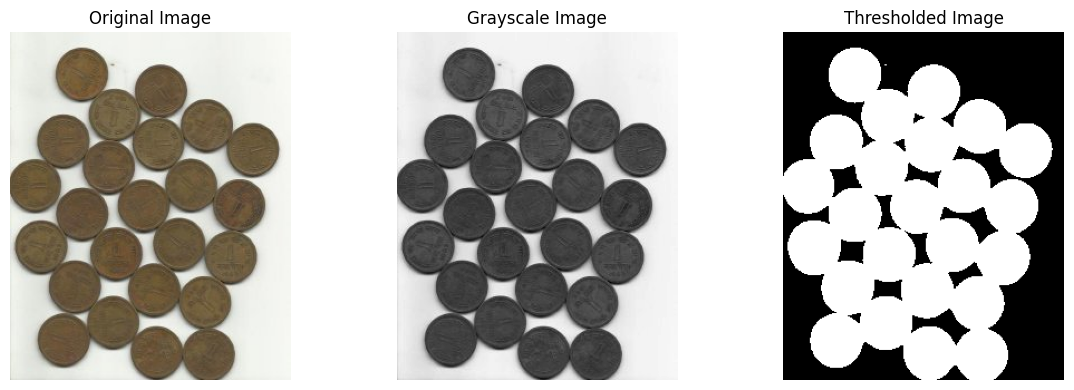

In [19]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('resources/lab6/money.png')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.figure(figsize=(12, 4))

# Original image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')

# Grayscale image
plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

# Thresholded image
plt.subplot(1, 3, 3)
plt.title('Thresholded Image')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

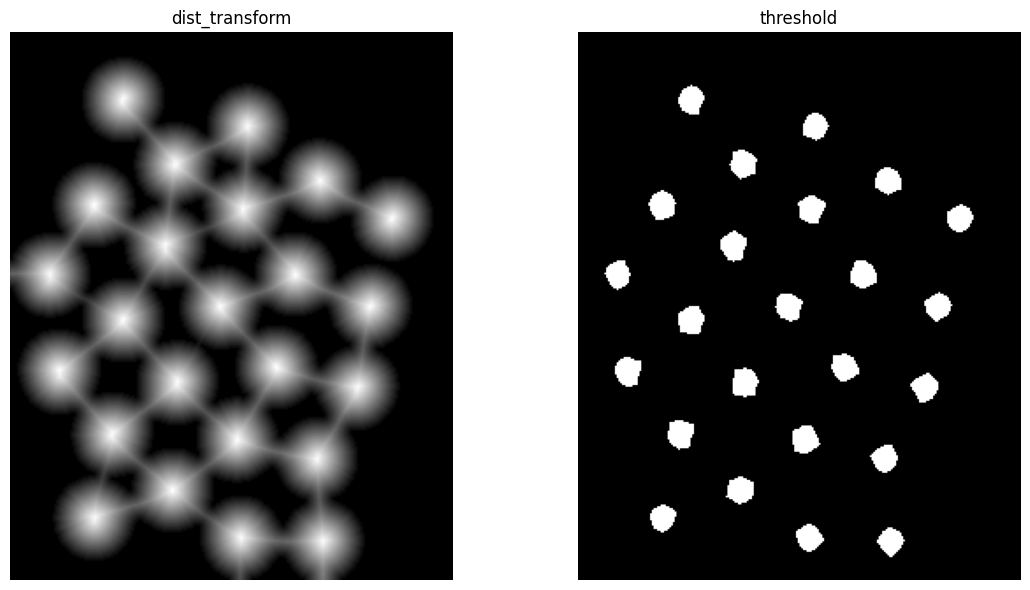

In [21]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

plt.figure(figsize=(12, 6))


# Morphological Closing
plt.subplot(1, 2, 1)
plt.title('dist_transform')
plt.imshow(dist_transform, cmap='gray')
plt.axis('off')

# Sure Background
plt.subplot(1, 2, 2)
plt.title('threshold')
plt.imshow(sure_fg, cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()


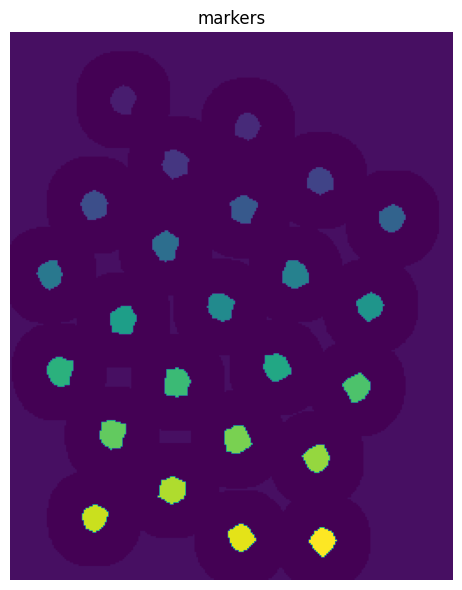

In [22]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.figure(figsize=(6, 6))


# Morphological Closing
plt.title('markers')
plt.imshow(markers)
plt.axis('off')

plt.tight_layout()
plt.show()

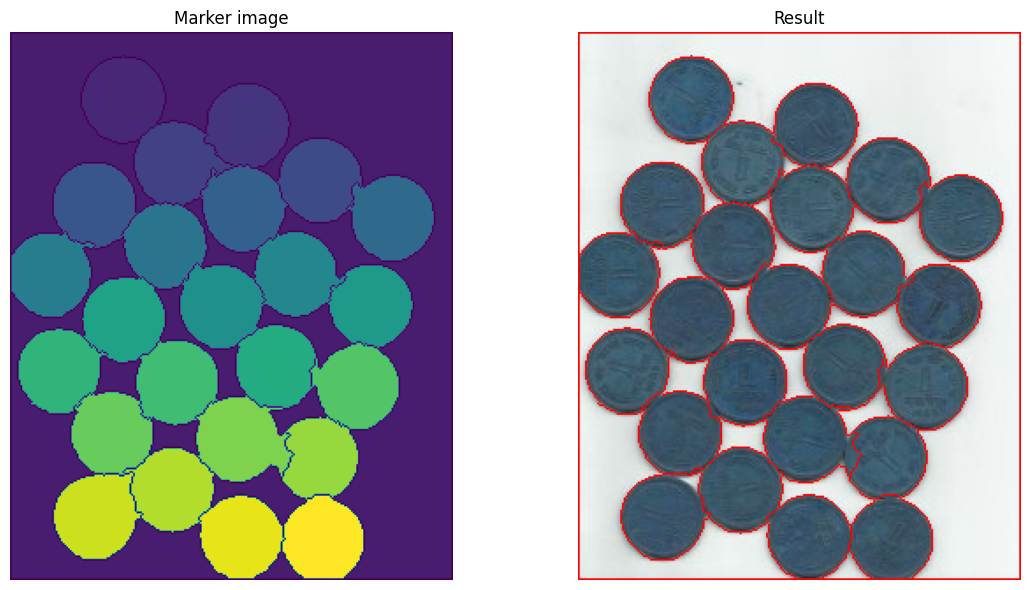

In [23]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.figure(figsize=(12, 6))


# Morphological Closing
plt.subplot(1, 2, 1)
plt.title('Marker image')
plt.imshow(markers)
plt.axis('off')

# Sure Background
plt.subplot(1, 2, 2)
plt.title('Result')
plt.imshow(img)
plt.axis('off')


plt.tight_layout()
plt.show()


In [24]:
from __future__ import print_function
import sys
 
import cv2 as cv
import numpy as np

In [26]:
def print_help():
    print('''
    This program demonstrated the use of the discrete Fourier transform (DFT).
    The dft of an image is taken and it's power spectrum is displayed.
    Usage:
    discrete_fourier_transform.py [image_name -- default lena.jpg]''')
 
 
def main(argv):
 
    print_help()
 
    filename = argv[0] if len(argv) > 0 else 'resources/lab6/money.png'
 
    I = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
    if I is None:
        print('Error opening image')
        return -1
    
    rows, cols = I.shape
    m = cv.getOptimalDFTSize( rows )
    n = cv.getOptimalDFTSize( cols )
    padded = cv.copyMakeBorder(I, 0, m - rows, 0, n - cols, cv.BORDER_CONSTANT, value=[0, 0, 0])
    
    planes = [np.float32(padded), np.zeros(padded.shape, np.float32)]
    complexI = cv.merge(planes)         # Add to the expanded another plane with zeros
    
    cv.dft(complexI, complexI)         # this way the result may fit in the source matrix
    
    cv.split(complexI, planes)                   # planes[0] = Re(DFT(I), planes[1] = Im(DFT(I))
    cv.magnitude(planes[0], planes[1], planes[0])# planes[0] = magnitude
    magI = planes[0]
    
    matOfOnes = np.ones(magI.shape, dtype=magI.dtype)
    cv.add(matOfOnes, magI, magI) #  switch to logarithmic scale
    cv.log(magI, magI)
    
    magI_rows, magI_cols = magI.shape
    # crop the spectrum, if it has an odd number of rows or columns
    magI = magI[0:(magI_rows & -2), 0:(magI_cols & -2)]
    cx = int(magI_rows/2)
    cy = int(magI_cols/2)
 
    q0 = magI[0:cx, 0:cy]         # Top-Left - Create a ROI per quadrant
    q1 = magI[cx:cx+cx, 0:cy]     # Top-Right
    q2 = magI[0:cx, cy:cy+cy]     # Bottom-Left
    q3 = magI[cx:cx+cx, cy:cy+cy] # Bottom-Right
 
    tmp = np.copy(q0)               # swap quadrants (Top-Left with Bottom-Right)
    magI[0:cx, 0:cy] = q3
    magI[cx:cx + cx, cy:cy + cy] = tmp
 
    tmp = np.copy(q1)               # swap quadrant (Top-Right with Bottom-Left)
    magI[cx:cx + cx, 0:cy] = q2
    magI[0:cx, cy:cy + cy] = tmp
    
    cv.normalize(magI, magI, 0, 1, cv.NORM_MINMAX) # Transform the matrix with float values into a
    
    cv.imshow("Input Image"       , I   )    # Show the result
    cv.imshow("spectrum magnitude", magI)
    cv.waitKey()
 
if __name__ == "__main__":
    main(sys.argv[1:])


    This program demonstrated the use of the discrete Fourier transform (DFT).
    The dft of an image is taken and it's power spectrum is displayed.
    Usage:
    discrete_fourier_transform.py [image_name -- default lena.jpg]


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\utils\samples.cpp:64: error: (-2:Unspecified error) OpenCV samples: Can't find required data file: --f=c:\Users\kirill\AppData\Roaming\jupyter\runtime\kernel-v3663d1697cd1134f4ebf47aecf6c3205aa4a9b235.json in function 'cv::samples::findFile'


[[ 211.99715  295.59262  658.41974 ...  525.6785   658.4156   295.59122]
 [ 770.48505  622.5451   598.34296 ...  673.87054  651.08777  540.8771 ]
 [ 615.9459   582.20685  965.7706  ...  974.27     462.67896  840.8299 ]
 ...
 [1102.5002   652.2646   621.24176 ...  711.42145  368.92334  551.47205]
 [ 615.9444   840.8305   462.67853 ... 1101.384    965.77     582.208  ]
 [ 770.4867   540.8752   651.08844 ...  631.8258   598.34283  622.54626]]
[[107.22558  113.84719  129.82721  ... 125.33181  129.82709  113.84709 ]
 [132.96634  128.70842  127.91668  ... 130.29042  129.60359  125.90079 ]
 [128.49562  127.370834 137.47923  ... 137.65428  122.78385  134.71156 ]
 ...
 [140.12485  129.63965  128.66656  ... 131.3734   118.265915 126.28806 ]
 [128.49557  134.71158  122.78383  ... 140.10461  137.47922  127.37088 ]
 [132.96638  125.90072  129.6036   ... 129.0039   127.91668  128.70847 ]]
[[107.22558  113.84719  129.82721  ... 133.6484   134.72845  142.21513 ]
 [132.96634  128.70842  127.91668  ... 

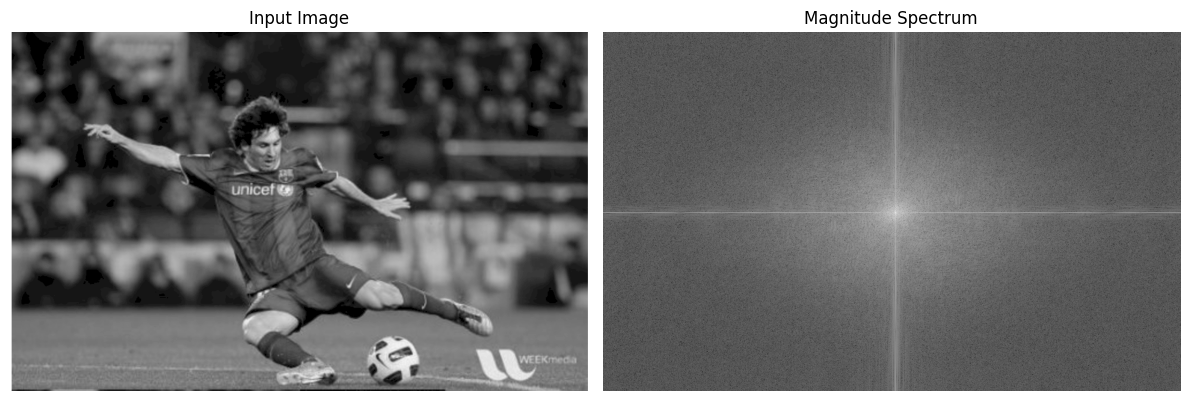

In [28]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load an image
img = cv.imread('resources/lab6/messi5.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Expand the image to an optimal size
rows, cols = img.shape
m = cv.getOptimalDFTSize(rows)
n = cv.getOptimalDFTSize(cols)
padded = cv.copyMakeBorder(img, 0, m - rows, 0, n - cols, cv.BORDER_CONSTANT, value=[0, 0, 0])

# Make place for both the complex and the real value
planes = [np.float32(padded), np.zeros(padded.shape, np.float32)]
complex_img = cv.merge(planes)

# Make the Discrete Fourier Transform
dft = cv.dft(complex_img)

# Transform the real and complex values to magnitude
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
print(magnitude_spectrum)
# Switch to a logarithmic scale
magnitude_spectrum += 1
magnitude_spectrum = 20 * np.log(magnitude_spectrum)
print(magnitude_spectrum)
# Crop and rearrange
magnitude_spectrum = magnitude_spectrum[0:rows, 0:cols]
print(magnitude_spectrum)
# Normalize
magnitude_spectrum = cv.normalize(magnitude_spectrum, None, 0, 255, cv.NORM_MINMAX)
print(magnitude_spectrum)
# Display the results using matplotlib
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

# Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.title('Magnitude Spectrum')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
